In [40]:
from sympy.vector import curl, divergence, gradient, CoordSys3D

In [41]:
transformation  = 'cartesian'
var_names = ['x', 'y', 'z']
vec_names = ['e_' + v for v in var_names]
R = CoordSys3D('', transformation=transformation, variable_names=var_names, vector_names=vec_names)

In [42]:
%run -i define_symbols_beta.py

1.1.2.dev


# Coriolis term for horizontal velocity ($w \to 0 $)

Vertical component of Earth's rotation vector

In [43]:
from sympy.abc import beta
f = (f1 + beta * R.y) * R.k
f

In [69]:
vort = curl(u)
vort_r = vort.dot(R.k)
div = divergence(u_h).doit()

In [45]:
corio = -f.cross(u)

In [46]:
corio

## Coriolis term in vorticity equation

$\nabla \times (-f \hat{e}_z \times \bf{u})$ is given by

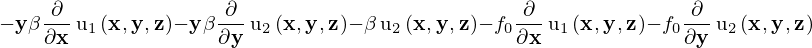

In [47]:
curl(corio).dot(R.k).expand()

Divergence in cartesian coordinates is given by

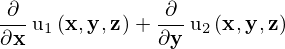

In [48]:
div.expand()

$u_3 = 0$ in the above equation because it is the 2D divergence --- which can be separated from the expression for $\nabla \times (-f \hat{e}_z \times \bf{u})$

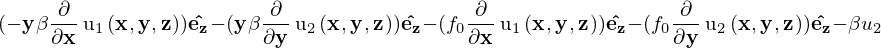

In [67]:
(- f * div).expand()  - beta * u2 

Therefore linearized vorticity equation can be written as (probably wrong):
$$\partial_t \zeta = -\beta v - (f_0 + \beta y) \nabla . \mathbf{u}$$

## Coriolis term in divergence equation

$\nabla . (-f \hat{e}_r \times \bf{u})$ is given by

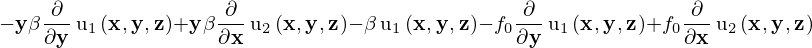

In [59]:
divergence(corio).expand()

Vertical component of vorticity (in the $\hat{e}_r$ direction), $\zeta$ in spherical coordinates is given by:

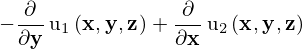

In [75]:
vort_r.doit()

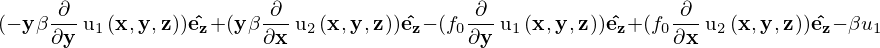

In [76]:
-beta * u1 + (f * vort_r).expand().doit()

Therefore linearized divergence equation can be written as:
$$\partial_t \nabla.\mathbf{u} = -\beta u + (f_0 +\beta y)\zeta - c^2 \nabla^2 \eta $$

## Linearized equations in vorticity-divergence formulation $(\zeta, \delta, \eta)$

$$
\begin{align}
\partial_t \zeta &= -\beta v - f\delta \\
\partial_t \delta &= -\beta u + f\zeta - c^2 \nabla^2 \eta \\
\partial_t \eta &= -\delta
\end{align}
$$

## Linearized equations in stream function-potential formulation $(\Psi, \Phi, \eta)$

Let stream function and velocity potential be defined as:

$$ \mathbf u = - \nabla \times (\Psi \hat{e}_z) + \nabla \Phi $$

which implies the velocities are given by:

$$u = -\Psi_y + \Phi_x$$
$$v = \Psi_x + \Phi_y$$

and also implies vorticity and divergence to be represented as:
$$\zeta = \nabla^2 \Psi$$
$$\delta = \nabla^2 \Phi$$

$$
\begin{align}
\partial_t \nabla^2 \Psi &= -\beta(\Psi_x + \Phi_y)  - f \nabla^2 \Phi \\
\partial_t \nabla^2 \Phi &= \beta(-\Psi_y + \Phi_x) + f\nabla^2 \Psi  - c^2 \nabla^2 \eta \\
\partial_t \eta &= -\nabla^2 \Phi
\end{align}
$$

**The eigenvalue problem and normal modes are solved in `normalmode_nb-beta.ipynb`**